In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### A. Base de données

In [2]:
df = pd.read_excel("beer_quality.xlsx")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.iloc[:, :11]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
y = df.iloc[:, -1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaler = sc.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

data_train_df = (X_train, y_train)

data_test_df = (X_test, y_test)

##### B. Classification binaire

In [7]:
# Calcul de la médiane 
mediane = np.median(np.array(y_train))
mediane

6.0

In [8]:
ybin = []
for i in y:
    if(i < mediane):
        ybin.append(0)
    else:
        ybin.append(1)
new_df = df.assign(y_bin = ybin)
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,y_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [9]:
target_dict = {k: v for v, k in enumerate(np.unique(ybin))}
target_dict

{0: 0, 1: 1}

In [10]:
del new_df['quality']
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
X = new_df.iloc[:, :11]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
y = new_df.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: y_bin, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaler = sc.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

data_train_df = (X_train, y_train)

data_test_df = (X_test, y_test)

###### Optimisation rapide d'un arbre de décision

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

###### Entraînement d'un ensemble d'arbre de décision "faibles" avec AdaBoost

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.55625


In [17]:
#Predict the response for test dataset
y_pred = model.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.5290437890974083


###### Visualisation de l'accuracy en fonction de n_estimators pour MAX_DEPTH = 1

In [18]:
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_train = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(criterion="entropy",max_depth=1), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_train.append(bdt.score(X_train, y_train))

In [19]:
from matplotlib import pyplot

n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_test = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(criterion="entropy",max_depth=1), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_test.append(bdt.score(X_test, y_test))

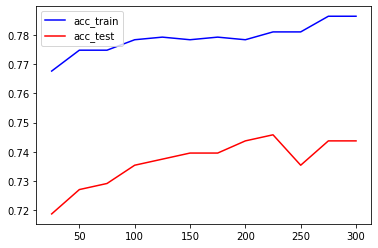

In [20]:
import pylab

pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()

###### Visualisation de l'accuracy en fonction de n_estimators pour MAX_DEPTH = 5

In [21]:
from matplotlib import pyplot

n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_train = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(criterion="entropy",max_depth=5), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_train.append(bdt.score(X_train, y_train))

In [22]:
from matplotlib import pyplot
n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_test = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(criterion="entropy",max_depth=5), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_test.append(bdt.score(X_test, y_test))

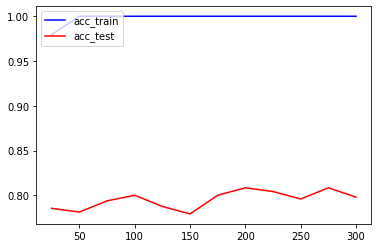

In [23]:
pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()

In [24]:
feature_names = [f"feature {i}" for i in range(X_scaled.shape[1])]
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(criterion="entropy",max_depth=5), algorithm="SAMME", n_estimators=n_estimators[i]
)
model = bdt.fit(X_train, y_train)

Text(0, 0.5, 'Feature')

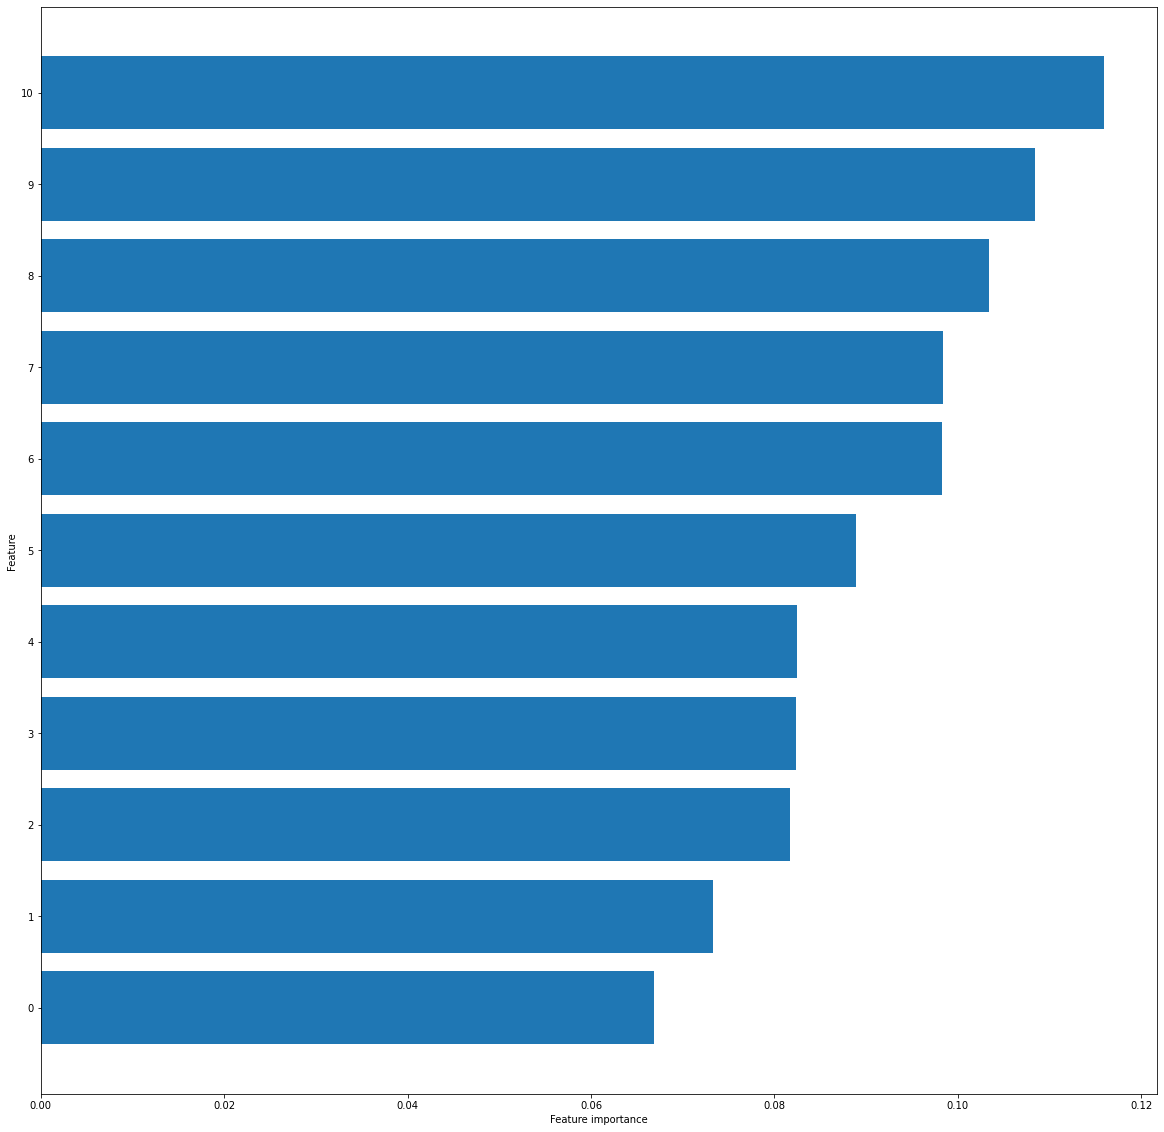

In [25]:
n_features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(n_features), sorted(model.feature_importances_), align='center') 
plt.yticks(np.arange(n_features)) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')


En théorie, avec le boosting, on entraîne nos arbres "en série" qui sont des modèles relativement faibles où chacun est en situation d'underfitting. Donc ici, ce type d'architecture doit permettre de réduire le biais de l'algorithme.

Dans notre cas, après la visualisation des graphes d'accuracy train/test, nous sommes en situation d'underfitting avec un biais haut et une variance haute car l'accuracy en train est supérieure à celle en test. De plus, l'écart entre les deux accuracy est très important.

##### Classification multiclasse

In [26]:
X = df.iloc[:, :11]
y = df.iloc[:, -1]

sc = StandardScaler()

scaler = sc.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

Sur l'application de la valeur des modalités : 

- Inférieur à 5 : 0
- Egale à 5 : 1
- Supérieur à 5 : 2

In [27]:
# Calcul de la médiane 
mediane = np.median(np.array(y_train))
mediane

6.0

In [28]:
ymulti = []
for i in y:
    if(i < mediane):
        ymulti.append(0)
    elif(i == mediane):
        ymulti.append(1)
    else:
        ymulti.append(2)
        
new_df_bis = df.assign(ymulti = ymulti)
new_df_bis

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ymulti
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [29]:
del new_df_bis['quality']
new_df_bis.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,ymulti
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [30]:
target_dict = {k: v for v, k in enumerate(np.unique(ymulti))}
target_dict

{0: 0, 1: 1, 2: 2}

In [31]:
X = new_df_bis.iloc[:, :11]
y = new_df_bis.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

###### Nombre d'éléments dans chaque classe

In [32]:
print("Nombre d'éléments dans la classe 0 : ", list(y_train).count(0))
print("Nombre d'éléments dans la classe 1 : ", list(y_train).count(1))
print("Nombre d'éléments dans la classe 2 : ", list(y_train).count(2))

Nombre d'éléments dans la classe 0 :  527
Nombre d'éléments dans la classe 1 :  441
Nombre d'éléments dans la classe 2 :  151


In [33]:
# Oversample and plot imbalanced dataset with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

# transform the dataset
oversample = SMOTE(sampling_strategy='minority')
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train_balanced)
print(counter)

Counter({0: 527, 2: 527, 1: 441})


On va re split nos données ré-échantillonées pour avoir 70% en apprentissage et 30% en validation.

In [34]:
X_train_balanced1, X_val_balanced, y_train_balanced1, y_val_balanced = train_test_split(X_train_balanced, y_train_balanced, test_size=0.3, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

###### Données équilibrées

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

clf1 = MLPClassifier(early_stopping= True)
param_grid1 = {'activation' : ['identity','logistic', 'tahn', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate' : ['constant', 'invscaling', 'adaptive'],
              'max_iter': [100, 200, 300]
             }
grid = GridSearchCV(clf1, param_grid1, cv = 5)
grid.fit(X_train_balanced1, y_train_balanced1)
grid.best_estimator_

C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, sel

MLPClassifier(early_stopping=True, solver='lbfgs')

In [36]:
from sklearn.metrics import confusion_matrix

model = grid.best_estimator_
model.fit(X_train_balanced1, y_train_balanced1)
y_pred_balanced = model.predict(X_val_balanced)
confusion_matrix(y_val_balanced, y_pred_balanced)

C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([[120,  32,   8],
       [ 42,  46,  43],
       [  2,  29, 127]], dtype=int64)

###### Données non équilibrées

In [37]:
clf2 = MLPClassifier(early_stopping= True)
param_grid2 = {'activation' : ['identity','logistic', 'tahn', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate' : ['constant', 'invscaling', 'adaptive'],
              'max_iter': [100, 200, 300]
             }
grid2 = GridSearchCV(clf2, param_grid2, cv = 5)
grid2.fit(X_train1, y_train1)
grid2.best_estimator_

C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, sel

MLPClassifier(early_stopping=True, solver='lbfgs')

In [38]:
from sklearn.metrics import confusion_matrix

model1 = grid.best_estimator_
model1.fit(X_train1, y_train1)
y_pred_balanced = model.predict(X_val)
confusion_matrix(y_val, y_pred_balanced)

C:\Users\Armel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([[117,  32,   2],
       [ 56,  73,  15],
       [  2,  21,  18]], dtype=int64)

On effectue un bagging en utilisant comme classifieur de base, notre réseau de neurones

###### Données équilibrées

In [39]:
from sklearn.ensemble import BaggingClassifier

n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_train = []

for i in range(len(n_estimators)):
    bagging = BaggingClassifier(base_estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=14), n_estimators=n_estimators[i], random_state=0)
    model = bagging.fit(X_train_balanced1, y_train_balanced1)
    accuracy_train.append(bagging.score(X_train_balanced1, y_train_balanced1))

In [40]:
n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_test = []

for i in range(len(n_estimators)):
    bagging = BaggingClassifier(base_estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=14), n_estimators=n_estimators[i], random_state=0)
    model = bagging.fit(X_train_balanced1, y_train_balanced1)
    accuracy_test.append(bagging.score(X_val_balanced, y_val_balanced))

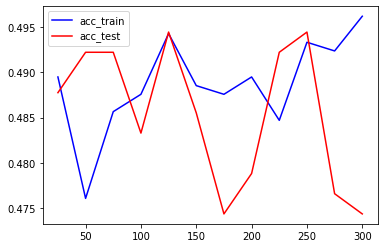

In [41]:
pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()

###### Données non équilibrées

In [42]:
n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_train = []

for i in range(len(n_estimators)):
    bagging = BaggingClassifier(base_estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=12), n_estimators=n_estimators[i], random_state=0)
    model = bagging.fit(X_train1, y_train1)
    accuracy_train.append(bagging.score(X_train1, y_train1))

In [43]:
n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_test = []

for i in range(len(n_estimators)):
    bagging = BaggingClassifier(base_estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=12), n_estimators=n_estimators[i], random_state=0)
    model = bagging.fit(X_train1, y_train1)
    accuracy_test.append(bagging.score(X_val, y_val))

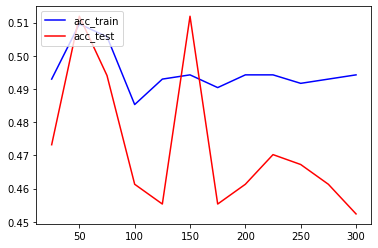

In [44]:
pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()